### Imports and data

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from cmdstanpy import CmdStanModel

# root/ w poniższych importach jest dodane ze względu na to gdzie trzymam te dane w przestrzeni docekra, u ciebie może być gdzie indziej albo wystarczyć samo data/data/preprocessing/data.csv
df = pd.read_csv("root/data/data_preprocessed/data.csv", index_col=0)

#### Checking id data is suitable for normal model

In [32]:

normality_test = stats.normaltest(np.array(df['Temperature']))

# Wyświetlanie wyników testu
print("Statystyka testu: ", normality_test.statistic)
print("Wartość p-wartości: ", normality_test.pvalue)

# Sprawdzenie interpretacji wyników testu
alpha = 0.05
if normality_test.pvalue < alpha:
    print("Dane nie pochodzą z rozkładu normalnego")
else:
    print("Dane są zgodne z rozkładem normalnym")

Statystyka testu:  3.3440751699526974
Wartość p-wartości:  0.18786388675829657
Dane są zgodne z rozkładem normalnym


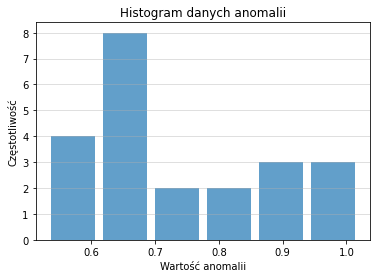

In [33]:
plt.hist(np.array(df['Temperature']), bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Wartość anomalii')
plt.ylabel('Częstotliwość')
plt.title('Histogram danych anomalii')
plt.show()

In [34]:
df.describe()

,year,CO2,CH4,N2O,Temperature
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2011.500000,394.154091,1817.905000,325.018220,0.744091
std,6.493587,14.618055,43.282048,5.969065,0.158284
min,2001.000000,371.319167,1771.269167,316.364167,0.530000
25%,2006.250000,382.574375,1778.368750,319.980625,0.632500
50%,2011.500000,392.953333,1805.632917,324.638333,0.680000
75%,2016.750000,406.171875,1848.098542,329.547083,0.887500
max,2022.000000,418.564167,1911.968333,335.662500,1.020000


##### 1. Rescaling CO2, CH4 and N2O 

In [35]:
df['CO2'] /= 100
df['CH4'] /= 1000
df['N2O'] /= 100
df

,year,CO2,CH4,N2O,Temperature
0,2001,3.713192,1.771269,3.163642,0.54
1,2002,3.734525,1.772732,3.169425,0.63
2,2003,3.759833,1.777334,3.176317,0.62
3,2004,3.776983,1.776996,3.182625,0.53
4,2005,3.799833,1.774180,3.189200,0.68
5,2006,3.820908,1.774970,3.198233,0.64
6,2007,3.840250,1.781473,3.204525,0.67
7,2008,3.858317,1.787088,3.215067,0.54
8,2009,3.876425,1.793573,3.222817,0.66
9,2010,3.901017,1.798954,3.231975,0.73


##### 2. Centering data

In [37]:
df['CO2_centred'] = df['CO2'] - df['CO2'].mean()
df['CH4_centred'] = df['CH4'] - df['CH4'].mean()
df['N2O_centred'] = df['N2O'] - df['N2O'].mean()
df

,year,CO2,CH4,N2O,Temperature,CO2_centred,CH4_centred,N2O_centred
0,2001,3.713192,1.771269,3.163642,0.54,-0.228349,-0.046636,-0.086541
1,2002,3.734525,1.772732,3.169425,0.63,-0.207016,-0.045173,-0.080757
2,2003,3.759833,1.777334,3.176317,0.62,-0.181708,-0.040571,-0.073866
3,2004,3.776983,1.776996,3.182625,0.53,-0.164558,-0.040909,-0.067557
4,2005,3.799833,1.774180,3.189200,0.68,-0.141708,-0.043725,-0.060982
5,2006,3.820908,1.774970,3.198233,0.64,-0.120633,-0.042935,-0.051949
6,2007,3.840250,1.781473,3.204525,0.67,-0.101291,-0.036432,-0.045657
7,2008,3.858317,1.787088,3.215067,0.54,-0.083224,-0.030817,-0.035116
8,2009,3.876425,1.793573,3.222817,0.66,-0.065116,-0.024332,-0.027366
9,2010,3.901017,1.798954,3.231975,0.73,-0.040524,-0.018951,-0.018207


---------------------------------------------------------------

In [194]:
df.describe()

,year,CO2,CH4,N2O,Temperature,CO2_centred,CH4_centred,N2O_centred
count,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,2.200000e+01,2.200000e+01
mean,2011.500000,3.941541,1.817905,3.250182,0.744091,8.881784e-16,8.074349e-17,2.826022e-16
std,6.493587,0.146181,0.043282,0.059691,0.158284,1.461806e-01,4.328205e-02,5.969065e-02
min,2001.000000,3.713192,1.771269,3.163642,0.530000,-2.283492e-01,-4.663583e-02,-8.654053e-02
25%,2006.250000,3.825744,1.778369,3.199806,0.632500,-1.157972e-01,-3.953625e-02,-5.037595e-02
50%,2011.500000,3.929533,1.805633,3.246383,0.680000,-1.200758e-02,-1.227208e-02,-3.798864e-03
75%,2016.750000,4.061719,1.848099,3.295471,0.887500,1.201778e-01,3.019354e-02,4.528864e-02
max,2022.000000,4.185642,1.911968,3.356625,1.020000,2.441008e-01,9.406333e-02,1.064428e-01


___________________________________________________________________________________

### 1. Model with one predictor CO2

#### 1.1. Prior predictive

In [247]:
# 1.Prepare data to simulation
data_sim={'N':len(df), 'CO2':np.linspace(df.CO2_centred.min(),df.CO2_centred.max(),len(df))}

In [260]:
# 2.Stan code
%%writefile root/stan_files/temp1_ppc.stan
data {
  int<lower=0> N;
  vector[N] CO2;
}

generated quantities {
  real alpha = normal_rng(0.75, 0.1);
  real beta = normal_rng(0, 1);
  real sigma = normal_rng(0.2, 0.1);
  vector[N] temperature;

  for (i in 1:N) {
    temperature[i] = normal_rng(alpha + beta * CO2[i], sigma);
  }
}

Overwriting root/stan_files/temp1_ppc.stan


In [261]:
# 3.Simulate model
model_ppc=CmdStanModel(stan_file='root/stan_files/temp1_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim,
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /root/stan_files/temp1_ppc.stan to exe file /root/stan_files/temp1_ppc
INFO:cmdstanpy:compiled model executable: /root/stan_files/temp1_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [262]:
# 4. Show the output
ppc_df = sim.draws_pd()
ppc_df.head()

,lp__,accept_stat__,alpha,beta,sigma,temperature[1],temperature[2],temperature[3],temperature[4],temperature[5],...,temperature[13],temperature[14],temperature[15],temperature[16],temperature[17],temperature[18],temperature[19],temperature[20],temperature[21],temperature[22]
0,0.0,0.0,1.020820,0.777181,0.072773,0.852634,0.759721,0.896232,0.983038,1.078140,...,1.174020,1.056960,1.045220,1.126310,1.117860,1.149020,1.204590,1.240450,1.175760,1.217560
1,0.0,0.0,0.579279,0.098292,0.135055,0.716311,0.539737,0.539650,0.649737,0.623721,...,0.618128,0.436287,0.728571,0.747041,0.846504,0.802336,0.631740,0.412131,0.528330,0.566518
2,0.0,0.0,0.826375,0.285297,0.264364,0.444276,0.765854,0.773084,1.101650,0.987704,...,1.216280,0.639524,0.983029,1.007750,1.106250,1.012760,0.797669,0.978295,0.870689,0.543565
3,0.0,0.0,0.821675,1.760190,0.166528,0.099858,0.521116,0.518221,0.382135,0.755358,...,0.580056,0.768227,1.176800,0.872228,1.004790,1.206550,1.577680,1.168070,1.061840,1.225230
4,0.0,0.0,0.654735,0.515505,0.095880,0.527453,0.673686,0.552939,0.530874,0.474237,...,0.472308,0.708933,0.483264,0.652679,0.638532,0.759030,0.598776,0.660041,0.876116,0.733345


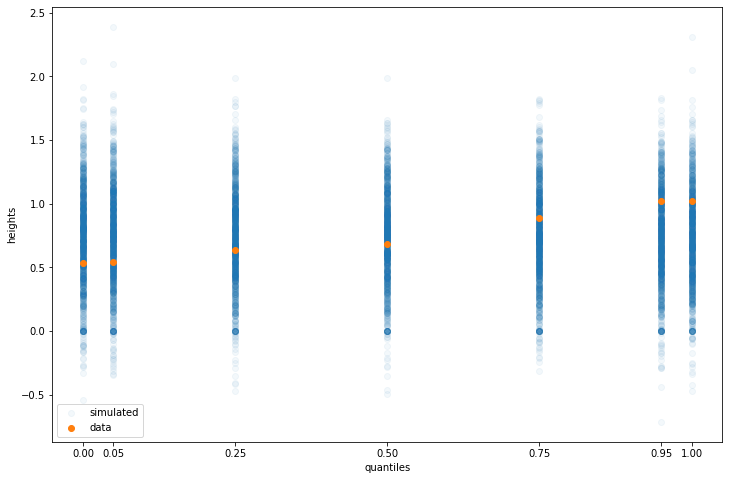

In [268]:
# 5. Plot data
temperature = ppc_df.loc[:, 'temperature[1]':'temperature[22]'].values
q = [0., 0.05, 0.25, 0.5, 0.75, 0.95, 1.]
quantiles = np.quantile(temperature, q, axis=1)
data_quantiles = np.quantile(df.Temperature, q)

plt.figure(figsize=(12, 8))
plt.scatter(q * np.ones((1000, 1)), quantiles, alpha=0.05, label='simulated')
plt.scatter(q, data_quantiles, label='data')
plt.xticks(q)
plt.xlabel('quantiles')
plt.ylabel('heights')
plt.legend()
plt.show()

#### 1.2. Fitting model to data

In [281]:
# 1. Stan file
%%writefile root/stan_files/temp2_ppc.stan

data {
    int<lower=0> N;
    vector[N] temp;
    vector[N] co2;
}

parameters {
    real<lower=0> alpha;
    real<lower=0> sigma;
    real<lower=0> beta;
}

transformed parameters {
    vector[N] mean;
    for (i in 1:N) {
      mean[i] = alpha + beta * co2[i];
  }
}

model {
    alpha ~ normal(0.75, 0.1);
    sigma ~ normal(0.2, 0.1);
    beta ~ normal(0, 1);
    for (i in 1:N) {
      temp[i] ~ normal(mean[i], sigma);
    }
}

generated quantities {
    vector[N] temp_;
    for (i in 1:N) {
        temp_[i] = normal_rng(mean[i], sigma);
    }
}

Overwriting root/stan_files/temp2_ppc.stan


In [282]:
# 2. Create model
model_2_fit=CmdStanModel(stan_file='root/stan_files/temp2_ppc.stan')

INFO:cmdstanpy:compiling stan file /root/stan_files/temp2_ppc.stan to exe file /root/stan_files/temp2_ppc
INFO:cmdstanpy:compiled model executable: /root/stan_files/temp2_ppc


In [285]:
# 3. Prepare data for the model
N = len(df)
data_fit = {'N': N, 'co2': df.CO2_centred.values[:N], 'temp': df.Temperature.values[:N]}

In [286]:
# 4. Simulate model
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [287]:
# 5. Show the output
df_ = fit.draws_pd()
df_.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,sigma,beta,...,temp_[13],temp_[14],temp_[15],temp_[16],temp_[17],temp_[18],temp_[19],temp_[20],temp_[21],temp_[22]
0,38.7189,0.922017,0.603952,2.0,3.0,0.0,-37.2798,0.770261,0.081817,1.090500,...,0.781068,0.768076,0.861121,0.907115,0.749104,0.888240,0.852084,1.032190,1.047240,1.05482
1,38.7832,1.000000,0.603952,3.0,7.0,0.0,-37.8409,0.733941,0.104082,0.725792,...,0.760494,0.767724,0.678353,0.727012,0.760728,0.741726,0.912906,0.971442,1.089960,1.04786
2,40.4542,0.997572,0.603952,3.0,7.0,0.0,-38.1893,0.752359,0.084949,0.861745,...,0.778886,0.717169,0.727222,0.783187,0.990883,1.013830,1.048850,0.896252,1.041580,1.06298
3,38.6676,0.883219,0.603952,3.0,7.0,0.0,-38.4101,0.743042,0.087683,0.675865,...,0.861267,0.769759,0.805533,0.813477,0.866383,0.848187,0.901419,0.708251,0.891836,1.02363
4,36.4884,0.931972,0.603952,2.0,3.0,0.0,-35.8244,0.740893,0.087832,0.562178,...,0.699253,0.708352,0.923621,0.744699,0.745950,0.829598,0.829193,0.914940,0.770405,0.68755


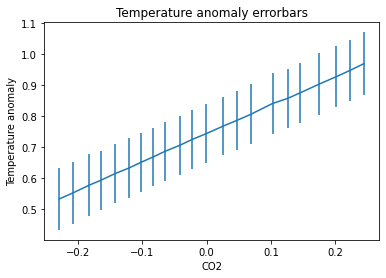

In [292]:
# 6. Plot results
temperature = df_.loc[:, 'temp_[1]':f'temp_[{N}]'].values
y = temperature.mean(axis=0)
x = data_fit['co2']
yerr = temperature.std(axis=0)

plt.errorbar(x, y, yerr)
plt.xlabel('CO2')
plt.ylabel('Temperature anomaly')
plt.title('Temperature anomaly errorbars')
plt.show()

_________________________________________________________

# Predictor as three gases combined

In [301]:
%%writefile root/stan_files/temp3_ppc.stan
data {
  int<lower=0> N;
  vector[N] CO2;
  vector[N] CH4;
  vector[N] N2O;
}

generated quantities {
  real alpha = normal_rng(0.75, 0.1);
  real beta_CO2 = normal_rng(0, 1);
  real beta_CH4 = normal_rng(0, 1);
  real beta_N2O = normal_rng(0, 1);
  real sigma = normal_rng(0.2, 0.1);
  vector[N] temperature;

  for (i in 1:N) {
    temperature[i] = normal_rng(alpha + beta_CO2 * CO2[i] + beta_CH4 * CH4[i] + beta_N2O * N2O[i], sigma);
  }
}


Overwriting root/stan_files/temp3_ppc.stan


In [302]:
data_sim={'N':len(df), 'CO2':np.linspace(df.CO2_centred.min(),df.CO2_centred.max(),len(df)),'CH4':np.linspace(df.CH4_centred.min(),df.CH4_centred.max(),len(df)),'N2O':np.linspace(df.N2O_centred.min(),df.N2O_centred.max(),len(df))}

In [303]:
model_ppc2=CmdStanModel(stan_file='root/stan_files/temp3_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim,
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /root/stan_files/temp3_ppc.stan to exe file /root/stan_files/temp3_ppc
INFO:cmdstanpy:compiled model executable: /root/stan_files/temp3_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [304]:
ppc_df = sim.draws_pd()
ppc_df.head()

,lp__,accept_stat__,alpha,beta,sigma,temperature[1],temperature[2],temperature[3],temperature[4],temperature[5],...,temperature[13],temperature[14],temperature[15],temperature[16],temperature[17],temperature[18],temperature[19],temperature[20],temperature[21],temperature[22]
0,0.0,0.0,1.020820,0.777181,0.072773,0.852634,0.759721,0.896232,0.983038,1.078140,...,1.174020,1.056960,1.045220,1.126310,1.117860,1.149020,1.204590,1.240450,1.175760,1.217560
1,0.0,0.0,0.579279,0.098292,0.135055,0.716311,0.539737,0.539650,0.649737,0.623721,...,0.618128,0.436287,0.728571,0.747041,0.846504,0.802336,0.631740,0.412131,0.528330,0.566518
2,0.0,0.0,0.826375,0.285297,0.264364,0.444276,0.765854,0.773084,1.101650,0.987704,...,1.216280,0.639524,0.983029,1.007750,1.106250,1.012760,0.797669,0.978295,0.870689,0.543565
3,0.0,0.0,0.821675,1.760190,0.166528,0.099858,0.521116,0.518221,0.382135,0.755358,...,0.580056,0.768227,1.176800,0.872228,1.004790,1.206550,1.577680,1.168070,1.061840,1.225230
4,0.0,0.0,0.654735,0.515505,0.095880,0.527453,0.673686,0.552939,0.530874,0.474237,...,0.472308,0.708933,0.483264,0.652679,0.638532,0.759030,0.598776,0.660041,0.876116,0.733345


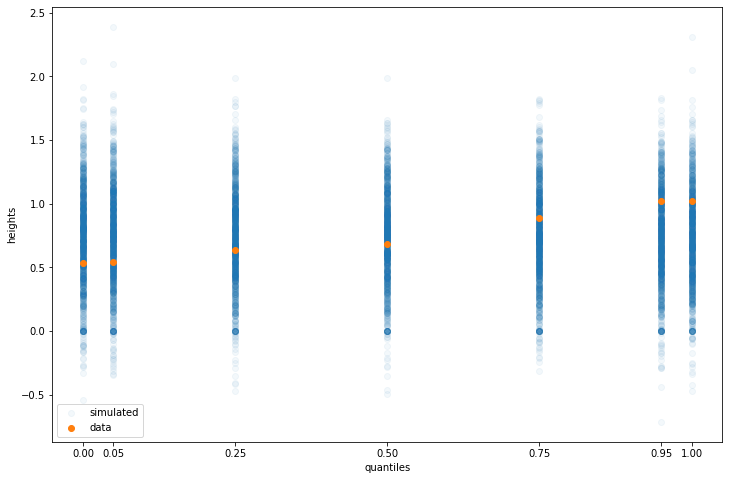

In [305]:
temperature = ppc_df.loc[:, 'temperature[1]':'temperature[22]'].values
q = [0., 0.05, 0.25, 0.5, 0.75, 0.95, 1.]
quantiles = np.quantile(temperature, q, axis=1)
data_quantiles = np.quantile(df.Temperature, q)

plt.figure(figsize=(12, 8))
plt.scatter(q * np.ones((1000, 1)), quantiles, alpha=0.05, label='simulated')
plt.scatter(q, data_quantiles, label='data')
plt.xticks(q)
plt.xlabel('quantiles')
plt.ylabel('heights')
plt.legend()
plt.show()

##### Fitting model to data

In [306]:
%%writefile root/stan_files/temp4_ppc.stan

data {
    int<lower=0> N;
    vector[N] temp;
    vector[N] CO2;
    vector[N] CH4;
    vector[N] N2O;
}

parameters {
    real<lower=0> alpha;
    real<lower=0> sigma;
    real<lower=0> beta_CO2;
    real<lower=0> beta_CH4;
    real<lower=0> beta_N2O;
}

transformed parameters {
    vector[N] mean;
    for (i in 1:N) {
        mean[i] = alpha + beta_CO2 * CO2[i] + beta_CH4 * CH4[i] + beta_N2O * N2O[i];
    }
}

model {
    alpha ~ normal(0.75, 0.1);
    sigma ~ normal(0.2, 0.1);
    beta_CO2 ~ normal(0, 1);
    beta_CH4 ~ normal(0, 1);
    beta_N2O ~ normal(0, 1);
    for (i in 1:N) {
        temp[i] ~ normal(mean[i], sigma);
    }
}

generated quantities {
    vector[N] temp_;
    for (i in 1:N) {
        temp_[i] = normal_rng(mean[i], sigma);
    }
}


Overwriting root/stan_files/temp4_ppc.stan


In [307]:
model_2_fit=CmdStanModel(stan_file='root/stan_files/temp4_ppc.stan')

INFO:cmdstanpy:compiling stan file /root/stan_files/temp4_ppc.stan to exe file /root/stan_files/temp4_ppc
INFO:cmdstanpy:compiled model executable: /root/stan_files/temp4_ppc


In [308]:
N = len(df)
data_fit = {'N': N, 'CO2': df.CO2_centred.values[:N], 'temp': df.Temperature.values[:N], 'CH4': df.CH4_centred.values[:N], 'N2O': df.N2O_centred.values[:N]}

In [309]:
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status







chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


In [310]:
df_ = fit.draws_pd()
df_.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,sigma,beta_CO2,...,temp_[13],temp_[14],temp_[15],temp_[16],temp_[17],temp_[18],temp_[19],temp_[20],temp_[21],temp_[22]
0,36.2140,0.918456,0.153576,4.0,15.0,0.0,-35.4898,0.754938,0.084288,0.915037,...,0.792471,0.909145,0.999709,0.903529,1.000450,0.987272,1.003550,1.049920,0.979606,1.005960
1,34.5302,0.818034,0.153576,3.0,15.0,0.0,-32.6939,0.745955,0.068102,0.242205,...,0.652235,0.815503,0.790298,0.873583,0.760883,0.786571,0.880921,0.971194,1.006490,1.054020
2,36.1288,0.970727,0.153576,4.0,15.0,0.0,-33.1561,0.729025,0.085423,0.238217,...,0.666905,0.817395,0.795622,0.751329,0.957160,0.861527,0.806543,0.805907,0.972561,1.026220
3,34.0922,0.747687,0.153576,5.0,31.0,0.0,-32.8032,0.761948,0.084132,0.597145,...,0.825784,0.895060,0.797819,0.742693,0.870074,1.008300,0.880502,0.938453,0.949555,0.955208
4,36.6706,0.982554,0.153576,5.0,31.0,0.0,-32.6821,0.726075,0.087980,0.191090,...,0.752949,0.713472,0.663630,0.846375,0.856870,0.887889,0.935775,0.934334,0.930163,0.950305


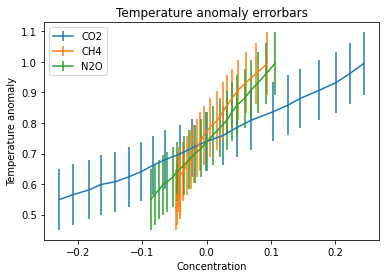

In [315]:
temperature = df_.loc[:, 'temp_[1]':f'temp_[{N}]'].values
y = temperature.mean(axis=0)
x_CO2 = data_fit['CO2']
x_CH4 = data_fit['CH4']
x_N2O = data_fit['N2O']
yerr = temperature.std(axis=0)

# Wykres
plt.errorbar(x_CO2, y, yerr, label='CO2')
plt.errorbar(x_CH4, y, yerr, label='CH4')
plt.errorbar(x_N2O, y, yerr, label='N2O')
plt.xlabel('Concentration')
plt.ylabel('Temperature anomaly')
plt.title('Temperature anomaly errorbars')
plt.legend()
plt.show()